In [1]:
import pandas as pd 

C:\Users\Nathaniel\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nathaniel\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Nathaniel\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df= pd.read_csv('user_behavior_dataset.csv')

In [3]:
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
# Compute summary statistics grouped by 'User Behavior Class'
summary_stats = df.groupby('User Behavior Class').agg({
    'App Usage Time (min/day)': ['mean', 'std', 'min', 'max'],
    'Screen On Time (hours/day)': ['mean', 'std', 'min', 'max'],
    'Battery Drain (mAh/day)': ['mean', 'std', 'min', 'max'],
    'Number of Apps Installed': ['mean', 'std', 'min', 'max'],
    'Data Usage (MB/day)': ['mean', 'std', 'min', 'max'],
    'Age': ['mean', 'std', 'min', 'max'],
}).reset_index()

summary_stats

User Behavior Class App Usage Time (min/day)                       \
                                          mean        std  min  max   
0                   1                60.426471  17.247064   30   89   
1                   2               131.972603  25.468559   91  179   
2                   3               235.398601  34.059629  181  299   
3                   4               395.748201  52.238319  301  478   
4                   5               541.419118  31.137105  481  598   

  Screen On Time (hours/day)                      Battery Drain (mAh/day)  \
                        mean       std  min   max                    mean   
0                   1.490441  0.280708  1.0   2.0              454.977941   
1                   3.037671  0.597713  2.0   4.0              883.808219   
2                   4.955944  0.591206  4.0   6.0             1515.055944   
3                   6.909353  0.577086  6.0   7.9             2105.805755   
4                  10.114706  1.134740  8.1  12.0             2701.014706   

   ... Number of Apps Installed     Data Usage (MB/day)                    \
   ...                      min max                mean         std   min   
0  ...                       10  19          202.323529   61.419129   102   
1  ...                       21  39          451.417808   90.600507   301   
2  ...                       41  59          822.013986  114.221121   608   
3  ...                       61  79         1232.230216  146.192266  1002   
4  ...                       81  99         1974.772059  297.455106  1508   

               Age                     
    max       mean        std min max  
0   299  38.213235  11.283819  18  59  
1   599  38.643836  11.595921  18  59  
2   997  38.678322  12.803829  18  59  
3  1499  38.676259  12.652098  18  59  
4  2497  38.176471  11.794463  18  59  

[5 rows x 25 columns]

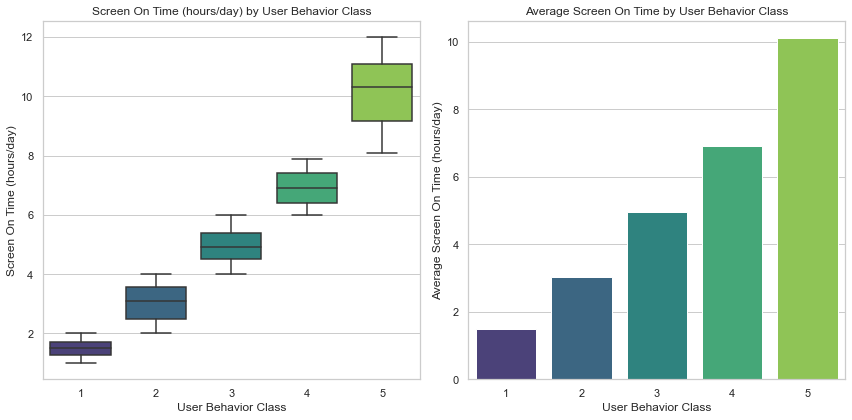

In [6]:
# Reload the necessary libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set a consistent style
sns.set(style="whitegrid")

# Create a figure for screen on time visualizations
plt.figure(figsize=(12, 6))

# Boxplot for Screen On Time by User Behavior Class
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="User Behavior Class", y="Screen On Time (hours/day)", palette="viridis")
plt.title("Screen On Time (hours/day) by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Screen On Time (hours/day)")

# Bar chart for average Screen On Time by User Behavior Class
plt.subplot(1, 2, 2)
avg_screen_time = df.groupby("User Behavior Class")["Screen On Time (hours/day)"].mean().reset_index()
sns.barplot(data=avg_screen_time, x="User Behavior Class", y="Screen On Time (hours/day)", palette="viridis")
plt.title("Average Screen On Time by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Average Screen On Time (hours/day)")

# Show the plots
plt.tight_layout()
plt.show()
